<a href="https://colab.research.google.com/github/aoranxu/Neural-Networks/blob/master/HW2_imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Loading the IMDB dataset
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


17465344/17464789 [==============================] - 1s 0us/step


In [6]:
#A look at the training data and labels
train_data[0]
train_labels[0]

1

In [11]:
#A look at the training data
max([max(sequence) for sequence in train_data])

9999

In [12]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 0s 0us/step


In [0]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
#     print (sequences)
    for i, sequence in enumerate(sequences):
#         print (i, sequence)
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results
# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [0]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [21]:
#Our model definition
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
#Compiling our model
 model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
#Configuring the optimizer
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
#Using custom losses and metrics
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [0]:
#Setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [27]:
#Training our model
 history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 244us/step - loss: 0.5087 - binary_accuracy: 0.7813 - val_loss: 0.3801 - val_binary_accuracy: 0.8695
Epoch 2/20
15000/15000 [==============================] - 3s 194us/step - loss: 0.3008 - binary_accuracy: 0.9051 - val_loss: 0.3006 - val_binary_accuracy: 0.8899
Epoch 3/20
15000/15000 [==============================] - 3s 193us/step - loss: 0.2181 - binary_accuracy: 0.9279 - val_loss: 0.3085 - val_binary_accuracy: 0.8719
Epoch 4/20
15000/15000 [==============================] - 3s 195us/step - loss: 0.1751 - binary_accuracy: 0.9432 - val_loss: 0.2840 - val_binary_accuracy: 0.8838
Epoch 5/20
15000/15000 [==============================] - 3s 193us/step - loss: 0.1427 - binary_accuracy: 0.9541 - val_loss: 0.2847 - val_binary_accuracy: 0.8865
Epoch 6/20
15000/15000 [==============================] - 3s 192us/step - loss: 0.1150 - bin

In [28]:
#The history dictionary
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

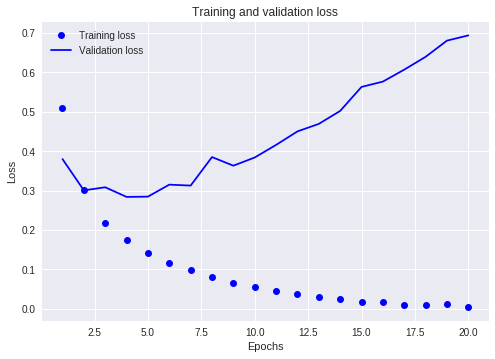

In [30]:
#Plotting the training and validation loss
import matplotlib.pyplot as plt
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

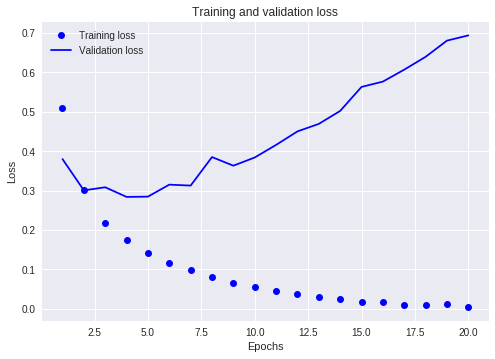

In [31]:
#Plotting the training and validation loss
import matplotlib.pyplot as plt
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

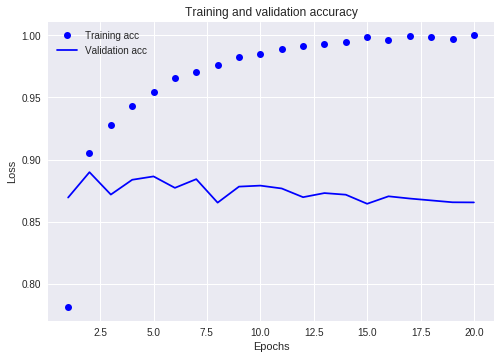

In [32]:
#Plotting the training and validation accuracy
plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [33]:
#Re-training a model from scratch
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 4s 146us/step - loss: 0.4746 - acc: 0.8218
Epoch 2/4
25000/25000 [==============================] - 4s 140us/step - loss: 0.2679 - acc: 0.9093
Epoch 3/4
25000/25000 [==============================] - 3s 139us/step - loss: 0.2033 - acc: 0.9282
Epoch 4/4
25000/25000 [==============================] - 2s 83us/step


In [34]:
results

[0.31271876770973206, 0.87572]

In [35]:
#Generating predictions for new data
model.predict(x_test)

array([[0.16332468],
       [0.99984854],
       [0.39982986],
       ...,
       [0.08062166],
       [0.04869828],
       [0.4509181 ]], dtype=float32)